In [ ]:
import numpy as np
import quantum_stuff as qs
import matplotlib.pyplot as plt
from tqdm import tqdm
import scienceplots
import sklearn.linear_model as LM
from scipy.special import comb
import nolds

plt.style.use(['science', 'no-latex'])

sx = qs.sigmax()
sy = qs.sigmay()
sz = qs.sigmaz()
I = np.eye(2)
xx = np.kron(sx, sx)
yy = np.kron(sy,sy)
zz = np.kron(sz,sz)

In [ ]:
def encoding(uk):
    op = np.einsum('i, jk -> ijk', (1-2*uk), qs.sigmaz())
    return 0.5*(I+op)

In [ ]:
Nq = 5
Js = 1
δt = 10/(Js)

wo = 1000
train_size = 10000
test_size = 10000
dim = wo + train_size + test_size
Z = qs.local_operators(sz, Nq)
X = qs.local_operators(sx, Nq)

In [ ]:
sk = qs.MackeyGlass(steps = dim + 200)[217:]
ρ = qs.FNencoding(sk, basis = 'z', dm = True)

In [ ]:
Δ = 1
Δ2 = 0
W = Δ2*Js
J = qs.random_coupling(Js, Nq)
D = np.random.uniform(-W, W, size = Nq)
h = Δ*Js

In [ ]:
H1 = qs.interaction(X, J) + np.dot((h + D),np.transpose(Z, (1, 0, 2)))

Memory Test

In [ ]:
ρ_res = [qs.random_qubit(Nq-1, dm = True) for i in range(2)]

In [ ]:
tstep = 1
outputs_traced = np.zeros((2, dim, 2**(Nq-1), 2**(Nq-1)), dtype = complex)
for i in tqdm(range(2)):
    outputs = qs.collisions(ρ, ρ_res[i], H1, δt, tstep)
    outputs_traced[i] = qs.ptrace(outputs, [k for k in range(1,Nq)])

100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


In [ ]:
dist = np.real(qs.distance(outputs_traced[0], outputs_traced[1]))

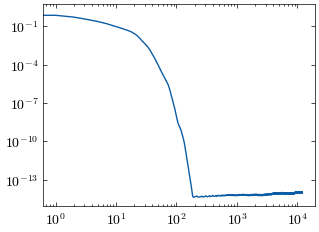

In [ ]:
plt.loglog(dist)

In [ ]:
x = np.zeros((dim, int(3*Nq + 3*comb(Nq, 2))))

In [ ]:
ρ_wo = ρ[:wo]
ρ_train = ρ[wo:wo + train_size]
output = qs.collisions(ρ_wo, ρ_res[0], H1, δt, tstep)
ρ_res = qs.ptrace(output[-1], list(range(1, Nq)))
output_train = qs.collisions(ρ_train, ρ_res, H1, δt, tstep)
ρ_res_test = qs.ptrace(output_train[-1], list(range(1, Nq)))

In [ ]:
x = np.hstack((qs.local_measurements(output_train), qs.two_qubits_measurements(output_train, [xx, yy, zz]), np.ones((train_size, 1))))
alpha = np.logspace(-9,3,1000)
ridge = LM.RidgeCV(alphas = alpha)
y_target = sk[wo+1:wo+train_size+1]
ridge.fit((x), y_target)


RidgeCV(alphas=array([1.00000000e-09, 1.02804473e-09, 1.05687597e-09, 1.08651577e-09,
       1.11698682e-09, 1.14831241e-09, 1.18051653e-09, 1.21362380e-09,
       1.24765955e-09, 1.28264983e-09, 1.31862140e-09, 1.35560179e-09,
       1.39361927e-09, 1.43270295e-09, 1.47288272e-09, 1.51418933e-09,
       1.55665436e-09, 1.60031031e-09, 1.64519059e-09, 1.69132952e-09,
       1.73876240e-09, 1.78752553e-0...
       5.29326606e+02, 5.44171429e+02, 5.59432571e+02, 5.75121707e+02,
       5.91250841e+02, 6.07832313e+02, 6.24878807e+02, 6.42403366e+02,
       6.60419396e+02, 6.78940681e+02, 6.97981391e+02, 7.17556092e+02,
       7.37679760e+02, 7.58367791e+02, 7.79636013e+02, 8.01500696e+02,
       8.23978568e+02, 8.47086827e+02, 8.70843150e+02, 8.95265713e+02,
       9.20373200e+02, 9.46184819e+02, 9.72720319e+02, 1.00000000e+03]))

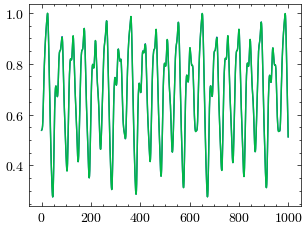

In [ ]:
plt.plot(range(train_size),sk[wo+1:wo+train_size+1], range(train_size), grid_search.predict(x))

In [ ]:
ρ_in = ρ[wo + train_size][np.newaxis]
ρ_res_test = qs.ptrace(output_train[-1], list(range(1, Nq)))
y_pred = np.zeros(test_size)
x_test = []
for i in range(200):
    output_test = qs.collisions(ρ_in, ρ_res_test, H1, δt, tstep)
    ρ_res_test = qs.ptrace(output_test[0], list(range(1,Nq)))
    x_test.append(np.hstack((qs.local_measurements(output_test), qs.two_qubits_measurements(output_test, [xx, yy, zz]), np.ones((1, 1)))))
    y_pred[i] = ridge.predict(x_test[i])
    if y_pred[i] < 0:
        y_pred[i] = 0
    ρ_in = qs.FNencoding(y_pred[np.newaxis, i], basis = 'z', dm = True)

C:\Users\marco\AppData\Local\Temp\ipykernel_13272\413901852.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
C:\Users\marco\AppData\Local\Temp\ipykernel_13272\413901852.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
C:\Users\marco\AppData\Local\Temp\ipykernel_13272\413901852.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
C:\Users\marco\AppData\Local\Temp\ipykernel_13272\413901852.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is d

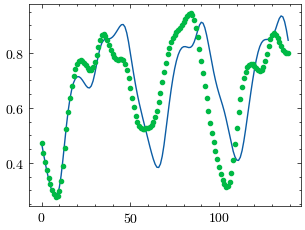

In [ ]:
plt.plot(range(test_size)[:140], sk[wo + train_size+1:][:140], range(test_size)[:140], y_pred[:140], '.')